# Analysis of Variance (ANOVA)

## Suggested reading

+ Grafen and Hails - Chapter 1
+ Dalgaard - Chapter 7

## The $\chi^2$ distribution

A $\chi^{2}$ distribution represents the **sum of squared random values** selected from a **normal distribution**. The degrees of freedom, $k$ is simply the number of random values.

$$Q = \sum\limits_{i=1}^{k} Z_{i}^{2}$$

#### $\chi^2$ with different sample sizes

Let's simulate this data to see what it looks like when k = 10, 5, and 1 and the values are retrieved from a standard normal distribution.


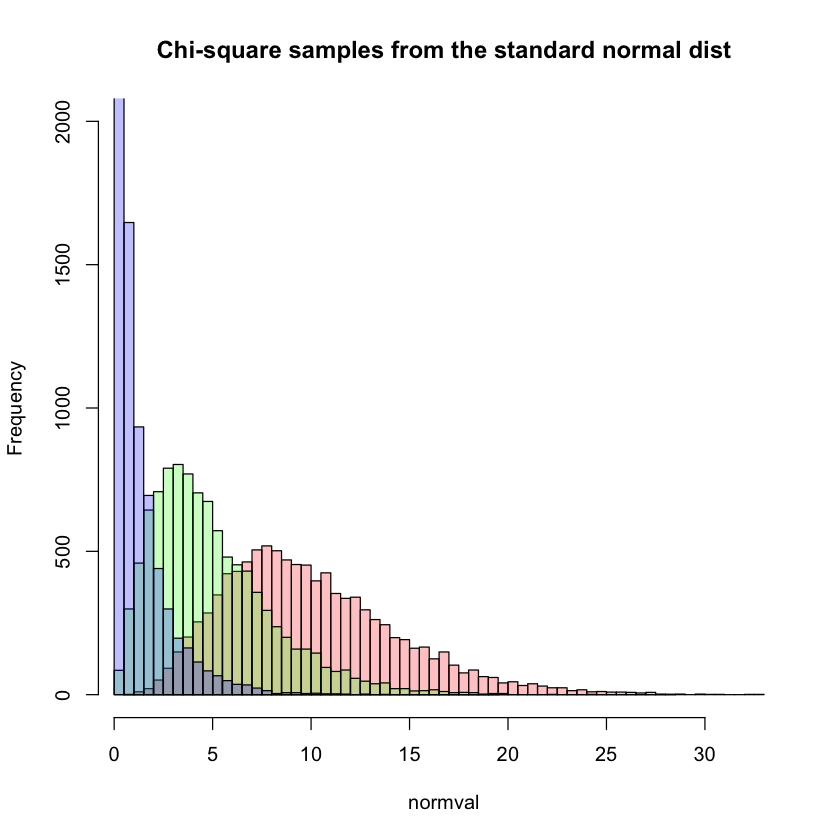

In [3]:
#################

# Sample size k = 10 ==> Chi-squared degrees of freedom = 10
chik=10
normval=numeric()
for (i in 1:10000) {  # repeat this 10000 times
  
  # Randomly sample k items from the standard normal distribution
  # then take the sum of squared values of the random samples
  normval[i]=sum(rnorm(chik)**2)
}

# make a histogram of the results
hist(normval, breaks=100, # make 100 bins on the x-axis
     col=rgb(1,0,0,.25),  # make it red, with 25% transparency
                          # this allows us to show multiple histograms on the same plot
     ylim=c(0,2000),      # set the limits of the y-axis
     main = "Chi-square samples from the standard normal dist"
    )
# Sample size k = 5 ==> Chi-squared degrees of freedom = 5
chik=5
normval=numeric()
for (i in 1:10000) {
  normval[i]=sum(rnorm(chik)**2)
}

# the `add` directive adds the new histogram to the old plot
hist(normval, breaks=75,          # reduce the number of bins since this distribution
                                  # is squished to the left
     col=rgb(0,1,0,.25), add=T)   # green, with 25% transparency

# Sample size k = 1 ==> Chi-squared degrees of freedom = 1
chik=1
normval=numeric()
for (i in 1:10000) {
  normval[i]=sum(rnorm(chik)**2)
}

hist(normval, breaks=50,          # use even fewer bins
     col=rgb(0,0,1,.25), add=T)   # blue, with 25% transparency


It is clear to see that as $k$ increases, the distribution begins to look like a **normal distribution**. 

This only happens when the **sample size is at least 10**, which is why it is not recommended to use the $\chi^{2}$ test for small values of $k$ (<10).

_**Note**_: we did not go over Fisher's exact test vs. the $\chi$-squared test for tabular data, but the same rules apply: when comparing observed vs. expected proportions, we must use Fisher's exact test for small sample sizes, and we can use the $\chi$-squared test for larger sample sizes.


## The $F$-statistic

To compare two $\chi^{2}$ distributions, we can simply take a ratio of them (taking into account their degree of freedom). This distribution is called an **$F$-distribution** and the _**ratio**_ is the **$F$-statistic**. (The $F$-distribution is named after the statistician Ron Fisher.)

#### F-distribution for samples from the same population

Let's first see what it would look like if the the means of the two populations that are being sampled are **equal**.


In [ ]:
chik=10
normval=numeric()
normval2=numeric()
for (i in 1:10000) {
   normval[i]=sum(rnorm(chik)**2)
   normval2[i]=sum(rnorm(chik)**2) 
  
}

# since the values are sampled from the same distribution, 
# the ratios are centered around 1
hist(((normval/(chik-1))/(normval2/(chik-1))),
     main = "Histogram of F-distribution",
     breaks=100, col=rgb(1,0,0,.25))


Note that depending on how close most of the density is to the mean, the heights of two histograms will vary, even if they are generated using exactly the same procedure. Run the above code several times and see how the results change each time.

#### F-distribution for populations with different means

What if the means of our normal distributions are different? 

We can make a second histogram showing the same ratio for data sampled from two normal distributions with different means: the standard normal and a normal distribution with mean = 2 and sd = 1.

Now, the ratio of the sums of the two samples will look quite different. Let's try this and superimpose the two histograms for comparison.


In [ ]:
# same as above -- sample two sums of squares from the same dist
chik=10
normval=numeric()
normval2=numeric()
for (i in 1:10000) {
  # take two sets of sample of size 10 from the standard normal distribution
   normval[i]=sum(rnorm(chik)**2)
   normval2[i]=sum(rnorm(chik)**2) 
  
}

# now plot the ratios of them
# note that we didn't bother to store the intermediate result
# since we don't need to do anything with it later.
hist(((normval2/(chik-1))/(normval/(chik-1))),
     main = "Histogram of F-distribution",
     breaks=100, ylim=c(0,1500), 
     xlim=c(0,30),
     col=rgb(1,0,0,.25))

## now compare sums of squares when the means are different
chik=10
normval=numeric()
normval2=numeric()
for (i in 1:10000) {
   normval[i]=sum(rnorm(chik)**2)
   normval2[i]=sum(rnorm(chik, mean=2)**2) 
  

}

hist(((normval2/(chik-1))/(normval/(chik-1))), 
     breaks = 500, col=rgb(1,1,0,.25), add=T)    # need a lot less breaks here


Remember that **variance** is essentially a sum of squares as discussed above. So now we have the ability to compare two different variances and use a statistic to determine if they are significantly different.

## ANOVA Example

The following example is from these Khan Academy videos:

- [Calculating SST](https://www.youtube.com/watch?v=EFdlFoHI_0I)
- [Calculating SSW and SSB](https://www.youtube.com/watch?v=j9ZPMlVHJVs)
- [Hypothesis Testing](https://www.youtube.com/watch?v=Xg8_iSkJpAE)

We previously discussed how we can use the $t$-test to determine if two sample distributions come from populations with the same mean (in which case, assuming equal variances, we can say that they come from the same population). 

In many cases, we will have _**multiple**_ sample groups and we will want to ask a similar question: **Are the means of the different samples the same ?**

To answer this question we will look at a very simple case with three conditions -- $a$, $b$, and $c$ -- and ask if their means are significantly different.


In [ ]:
# measurements for three conditions
a=c(3,2,1)
b=c(5,3,4)
c=c(5,6,7)

anova_mat = cbind(a,b,c)  # combine the data into a 3x3 matrix
anova_mat                 # take a look at the matrix

boxplot(as.data.frame(anova_mat)) # plot it as a data frame


Looking at the boxplots above, it is clear to see that their means are indeed different. So the question we want to ask is whether the differences are **significant**.

Instead of looking at the difference between the sample means, as we did with $t$-test, we will compare variances. There are three different variances that we can calculate:

- **$SST$** ( Total Sum of Squares ) = variation of all the points to the overall mean.
- **$SSW$** ( Within Group Sum of Squares ) = variation of the data within each group.
- **$SSB$** ( Between Group Sum of Squares ) = variation of the group mean to the overall mean.

We also need the _**degrees of freedom**_. Given that you know the average, how many values you need to know? It's simply one less than the number of items being considered for each comparison, because using the mean you can always calcuate the last value.

To calculate $SST$, we simply take the difference of all the values from the overall mean, square them, and then take the sum.


In [ ]:
# overall mean of the data
anova_mat_mean = mean(anova_mat)

# total variation = sum of squared deviations 
#                   of each data point from the overall mean
SST = sum((anova_mat - anova_mat_mean)**2)
SST


Since this is a sample of the entire population, our degrees of freedom equal the total number of values minus one.



In [ ]:
# total degrees of freedom = (# of data points) - 1
SST_df = length(anova_mat)-1
SST_df


SSW ( Within Group Sum of Squares ) = variation of the data within each group. Here we calculate the variation of each point relative to the mean of its own group and simply add up the squared differences across all the groups.



In [ ]:
anova_mat_col_mean = colMeans(anova_mat)
anova_mat_col_mean

SSW=0
for ( i in 1:nrow(anova_mat)) {
  SSW = SSW + sum((anova_mat[i,]-anova_mat_col_mean)**2)
}
SSW


When calculating the degree of freedom, remember that we calculated the sum of squared differences relative every group's mean, so if we have *m* groups and *n* samples in each group, then ``df = m*(n-1)``.



In [ ]:
SSW_df = ncol(anova_mat)*(nrow(anova_mat)-1)
SSW_df


SSB ( Between Group Sum of Squares ) = variation of the group mean to the overall mean. First, we find the sum of squared differences for each group mean compared to the overall mean. We also multiply by the number of values in the group to create a SS comparison for each of the original datapoints.



In [ ]:
SSB = 0

for ( i in 1:length(anova_mat_col_mean)) {
 SSB = SSB + (nrow(anova_mat)*(anova_mat_col_mean[i]-anova_mat_mean)^2)
}
SSB


For calculating between group degree of freedom, remember that if we have *m* groups, so it is simply *m-1*.



In [ ]:
SSB_df = ncol(anova_mat)-1
SSB_df


Finally since our variance calculations are sums of squares, they can be considered to follow a $\chi^2$ distribution. If the variance within the groups is the same and if the means of the groups are the same, then the variance between the groups should be the same as within the groups. 

We can take this one step further and say that if the variance *between* the groups is *greater* than *within* the groups, then the means of the groups are different. Any change in the ratio would fit an *F-distribution* and a $p$-value can be calculated.


In [ ]:
Fstat = (SSB/SSB_df) / (SSW/SSW_df)  # (24/2) / (6/6)
pf(Fstat, 2, 6, lower.tail = F)      # df1 = df(W) = 2; df2 = df(B) = 6 


We can confirm our results using the **aov** function. 



In [ ]:
library(reshape2)

# we use the melt function to reshape the data frame into three columns:
# Var1 = the three groups, indexed as 1, 2, 3
# Var2 = the three groups, indexed by their variable name
# value = the value of each data point
anova_mat.melt = melt(anova_mat)
anova_mat.melt  # look at this new data structure

# look at the result of the ANOVA command `aov`
# the syntax is to do the analysis of the values in response to the factors (groups a,b,c)
summary(aov(anova_mat.melt$value ~ anova_mat.melt$Var2))
